**Data Cleaning**

In [2]:
import pandas as pd
import numpy as np

In [3]:
#DataSet
df = pd.read_csv('/content/OnlineRetail.csv',encoding='unicode_escape')
print(df.shape)
df.head()

(125339, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#Basic Inspection
df.info()
df.describe()        # summary
df.isnull().sum()    # for missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125339 entries, 0 to 125338
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    125339 non-null  object 
 1   StockCode    125339 non-null  object 
 2   Description  124994 non-null  object 
 3   Quantity     125338 non-null  float64
 4   InvoiceDate  125338 non-null  object 
 5   UnitPrice    125338 non-null  float64
 6   CustomerID   84465 non-null   float64
 7   Country      125338 non-null  object 
dtypes: float64(3), object(5)
memory usage: 7.7+ MB


,0
InvoiceNo,0
StockCode,0
Description,345
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,40874
Country,1


In [6]:
# Remove Irrelevent Data
df= df.dropna(subset=['CustomerID'])
df= df.drop_duplicates()
df.columns= df.columns.str.strip().str.replace(' ','_')


In [7]:
df= df[df['Quantity']>0]
df['TotalSale']= df['Quantity']*df['UnitPrice']


In [11]:
#convert into date-time formate
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['Year']= df['InvoiceDate'].dt.year
df['Month']= df['InvoiceDate'].dt.month


In [9]:
#Outliers
df = df[df['Quantity'] < df['Quantity'].quantile(0.99)]
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]
df['Country'] = df['Country'].str.strip().str.title()



In [12]:
print(df.shape)
print(df.isnull().sum())
df.head()


(79296, 13)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSale      0
Year           0
Month          0
Day            0
Hour           0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8


In [13]:
df.to_csv('Cleaned_OnlineRetail.csv', index=False)


**Exploratory Data Analysis (EDA)**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cleaned dataset
df = pd.read_csv('/content/Cleaned_OnlineRetail.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [15]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalSale,0
Year,0


In [17]:
total_sale = df['TotalSale'].sum()
total_customers = df['CustomerID'].nunique()
total_invoices = df['InvoiceNo'].nunique()

print(f"Total Sale: ${total_sale:,.2f}")
print(f"Unique Customers: {total_customers}")
print(f"Total Invoices: {total_invoices}")


Total Sale: $1,470,990.51
Unique Customers: 1923
Total Invoices: 3992


/tmp/ipython-input-161869124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


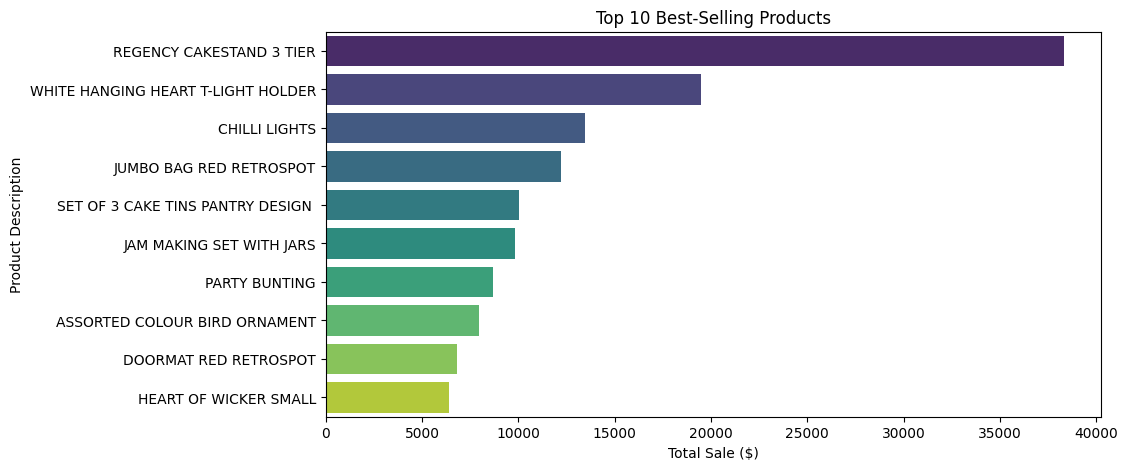

In [18]:
# Best selling product
top_products = (
    df.groupby('Description')['TotalSale']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sale ($)")
plt.ylabel("Product Description")
plt.show()


/tmp/ipython-input-1668102803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


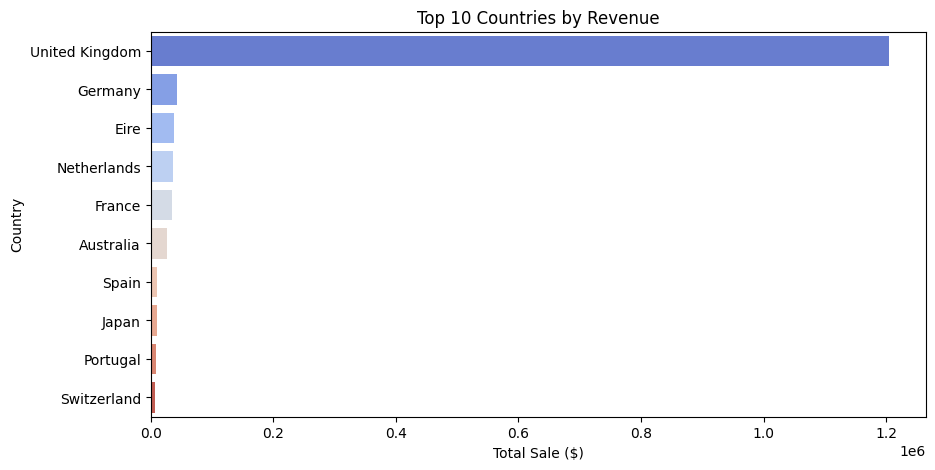

In [19]:
# Countries by revenue
top_countries = (
    df.groupby('Country')['TotalSale']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Sale ($)")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-1629437504.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")


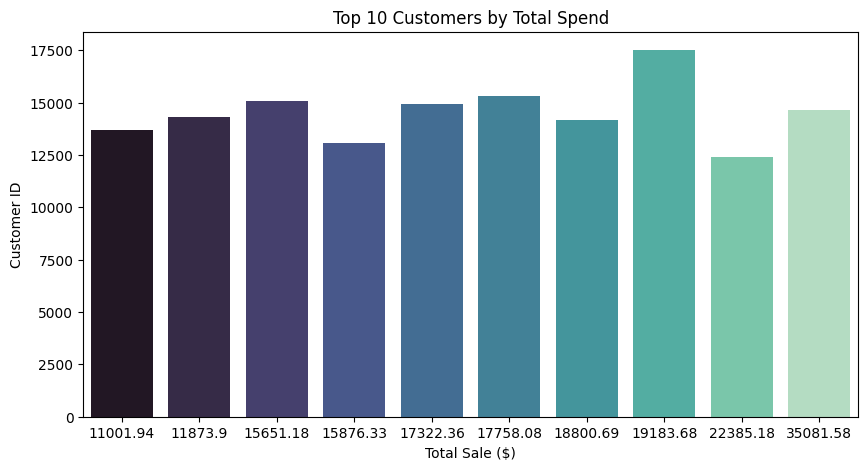

In [20]:
# Top Customers
top_customers = (
    df.groupby('CustomerID')['TotalSale']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Total Sale ($)")
plt.ylabel("Customer ID")
plt.show()


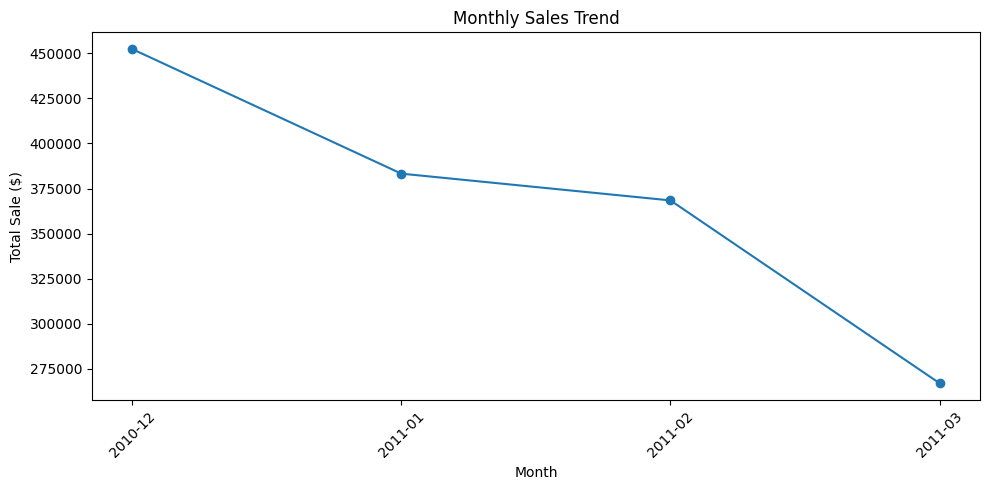

In [21]:
# Monthly Sales
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = (
    df.groupby('Month')['TotalSale']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalSale'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sale ($)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-83288461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="crest")


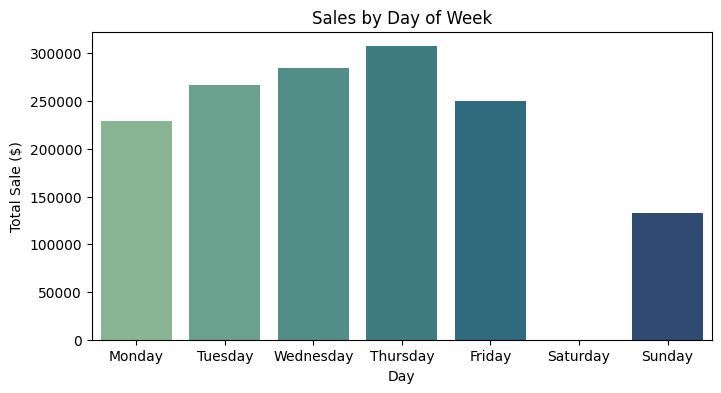

In [22]:
# Daily sales trend
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
daily_sales = df.groupby('DayOfWeek')['TotalSale'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

plt.figure(figsize=(8,4))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="crest")
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Sale ($)")
plt.show()


In [23]:
monthly_sales.to_csv('Monthly_Sales.csv', index=False)
top_products.to_csv('Top_Products.csv')
top_countries.to_csv('Top_Countries.csv')


**Customer Segmentation using RFM and K-Means**

In [24]:
import pandas as pd
import datetime as dt
df = pd.read_csv("/content/Cleaned_OnlineRetail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [25]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print("Snapshot date:", snapshot_date)


Snapshot date: 2011-03-21 10:56:00


In [27]:
# RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSale': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSale': 'Monetary'}, inplace=True)
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,53,2,1187.18
1,12348.0,55,2,589.68
2,12350.0,46,1,294.40
3,12352.0,3,3,521.18
4,12356.0,62,1,1947.62


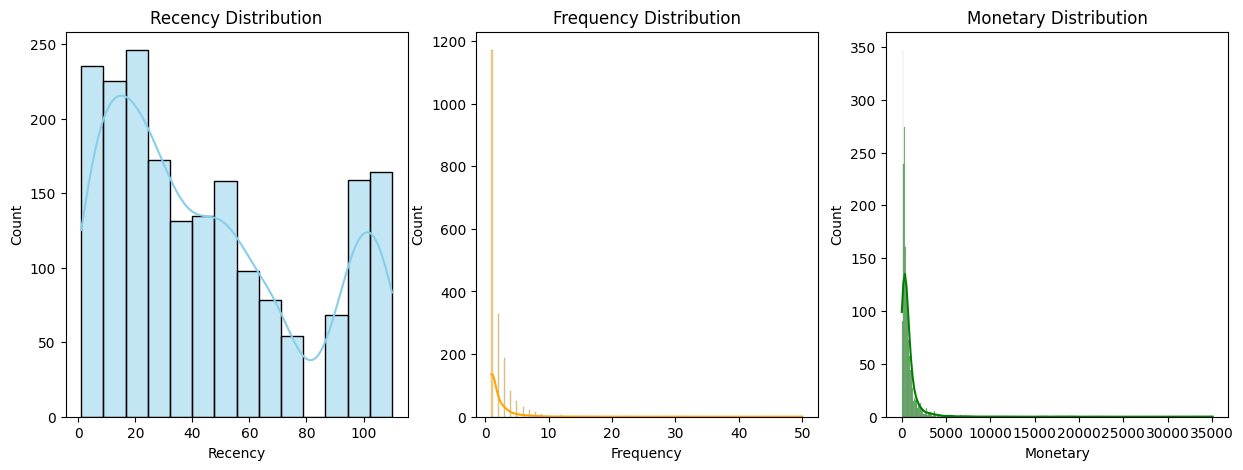

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], ax=ax[0], kde=True, color='skyblue')
sns.histplot(rfm['Frequency'], ax=ax[1], kde=True, color='orange')
sns.histplot(rfm['Monetary'], ax=ax[2], kde=True, color='green')
ax[0].set_title('Recency Distribution')
ax[1].set_title('Frequency Distribution')
ax[2].set_title('Monetary Distribution')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']].copy()
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)


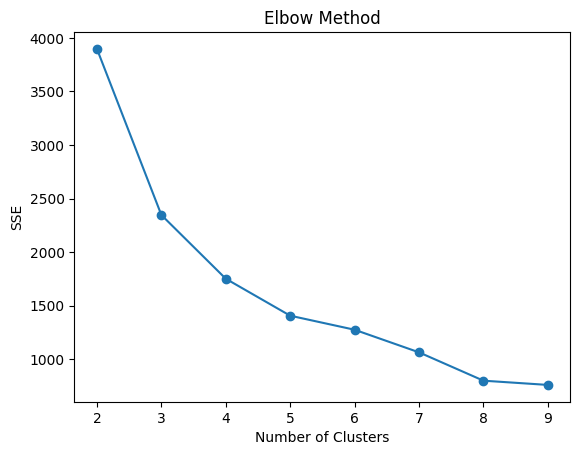

In [30]:
# Clustring
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [31]:
rfm_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

rfm_summary


Recency Frequency  Monetary      
           mean      mean      mean count
Segment                                  
0         13.87     21.40  14344.75    15
1         89.00      1.22    377.72   596
2         27.16      1.61    511.50  1118
3         16.76      5.92   2365.16   194

In [32]:
rfm['Segment_Label'] = rfm['Segment'].map({
    0: 'VIP Customers',
    1: 'Regular Buyers',
    2: 'Occasional Buyers',
    3: 'Lost Customers'
})


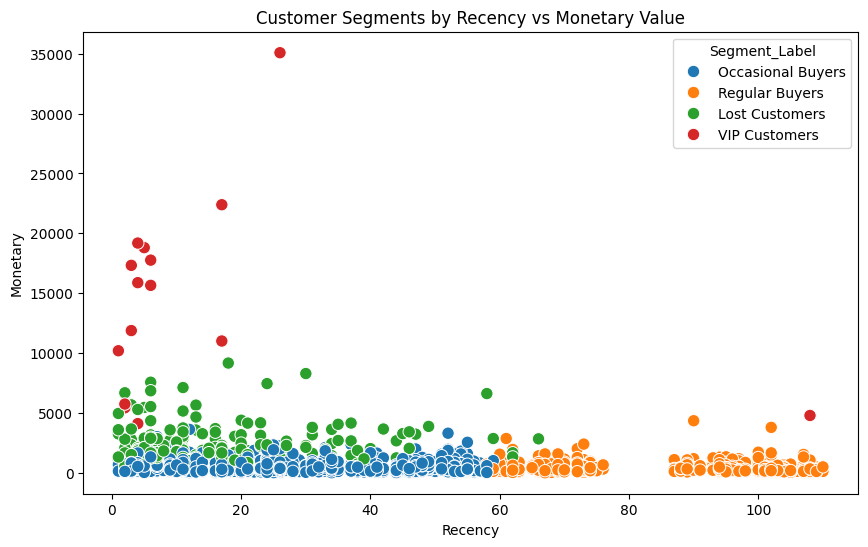

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment_Label', palette='tab10', s=80)
plt.title("Customer Segments by Recency vs Monetary Value")
plt.show()


In [34]:
rfm.to_csv('Customer_Segments.csv', index=False)


**Demand Forecasting**

In [89]:
import pandas as pd

# Load original cleaned dataset
df = pd.read_csv("/content/Cleaned_OnlineRetail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Week column
df['Week'] = df['InvoiceDate'].dt.to_period('W')  # weekly periods
weekly_sales = df.groupby('Week')['TotalSale'].sum().reset_index()

# Convert period to datetime for Prophet by taking the start of the week
weekly_sales['Week'] = weekly_sales['Week'].apply(lambda x: x.start_time)
sales = weekly_sales.rename(columns={'Week': 'ds', 'TotalSale': 'y'})
sales['ds'] = pd.to_datetime(sales['ds'])

In [90]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=False)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # monthly pattern
model.fit(sales)

# Forecast next 12 weeks
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr2qnwpn/wimb7mea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr2qnwpn/0ijg9j3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44899', 'data', 'file=/tmp/tmpxr2qnwpn/wimb7mea.json', 'init=/tmp/tmpxr2qnwpn/0ijg9j3_.json', 'output', 'file=/tmp/tmpxr2qnwpn/prophet_model7k1v6gek/prophet_model-20251020060525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
pip install prophet


In [92]:
from prophet import Prophet

model = Prophet()
model.fit(sales)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr2qnwpn/xfkyqfqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr2qnwpn/ojsx58vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26249', 'data', 'file=/tmp/tmpxr2qnwpn/xfkyqfqd.json', 'init=/tmp/tmpxr2qnwpn/ojsx58vm.json', 'output', 'file=/tmp/tmpxr2qnwpn/prophet_modelq_bwj1el/prophet_model-20251020060614.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:06:14 - cmdstanpy - INFO - Chain [1] start processing
I

In [93]:
# Future Forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)




/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


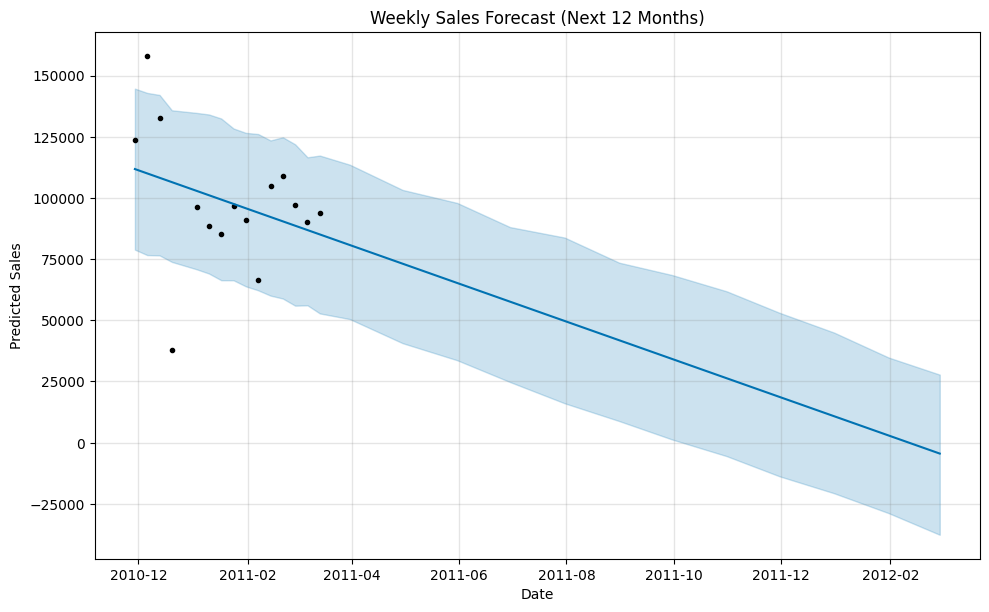

In [94]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Weekly Sales Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.show()


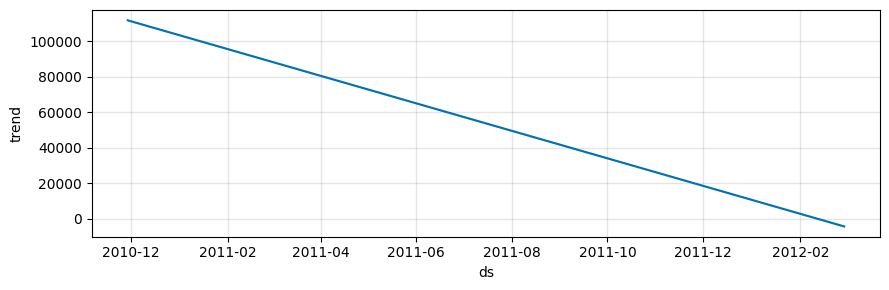

In [95]:
model.plot_components(forecast)
plt.show()


In [97]:
test_size = 8
train = sales.iloc[:-test_size]
test = sales.iloc[-test_size:]

future = model.make_future_dataframe(periods=test_size, freq='W')
forecast = model.predict(future)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast['yhat'][-len(test):].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 19685.62
RMSE: 21001.68
MAPE: 20.74%


In [98]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("Sales_Forecast.csv", index=False)


# **Visualization**

In [99]:

!pip install plotly --quiet


In [100]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [101]:

forecast = pd.read_csv("/content/Sales_Forecast.csv")
forecast.head()


,ds,yhat,yhat_lower,yhat_upper
0,2010-11-29,111785.301450,78552.680511,145108.326181
1,2010-12-06,110004.930825,76024.575972,141296.390390
2,2010-12-13,108224.560206,77079.382112,139891.044542
3,2010-12-20,106444.189582,75334.928071,139040.271049
4,2011-01-03,102883.448336,68824.170252,134579.601120


In [102]:

if 'y' in forecast.columns:
    y_true = forecast['y'].values
    y_pred = forecast['yhat'].values

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"Forecast Accuracy:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAPE : {mape:.2f}%")
else:
    print(" No actual sales ('y') column found. Only forecast will be plotted.")


 No actual sales ('y') column found. Only forecast will be plotted.


In [103]:
fig = go.Figure()

# Forecast line
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    mode='lines', name='Forecast', line=dict(color='blue')
))

# Confidence interval (if available)
if 'yhat_lower' in forecast.columns and 'yhat_upper' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_upper'],
        mode='lines', line=dict(width=0), showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_lower'],
        mode='lines', fill='tonexty', line=dict(width=0),
        fillcolor='rgba(173,216,230,0.3)', name='Confidence Interval'
    ))

# Optional: add actual sales if available
if 'y' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['y'],
        mode='markers+lines', name='Actual Sales', line=dict(color='black'), marker=dict(size=6)
    ))

# Add accuracy info to title if computed
title_text = "Weekly Sales Forecast"
if 'mape' in locals():
    title_text += f" | MAPE: {mape:.2f}%"

fig.update_layout(
    title=title_text,
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    hovermode="x unified"
)

fig.show()


In [104]:
# Export interactive chart to standalone HTML
fig.write_html("Weekly_Sales_Forecast_Dashboard.html")
print("✅ Dashboard saved as 'Weekly_Sales_Forecast_Dashboard.html'. Open in browser to view.")


✅ Dashboard saved as 'Weekly_Sales_Forecast_Dashboard.html'. Open in browser to view.


In [109]:
fig.update_layout(
    title=title_text,
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white',
    hovermode="x unified",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=28, label="1 Month", step="day", stepmode="backward"),   # 4 weeks ~ 28 days
                dict(count=84, label="3 Months", step="day", stepmode="backward"),  # 12 weeks ~ 84 days
                dict(count=182, label="6 Months", step="day", stepmode="backward"), # 26 weeks ~ 182 days
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)
